## <b>Import Libraries

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
import seaborn as sns
sns.set()

## <b>Import Data

In [454]:
df=pd.read_csv("C:/Users/Souhar/OneDrive/Desktop/Christ programming/MDS372(Machine Learning)/Final Project/Dataset/Food wastage data.csv")

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    2136 non-null   object 
 1   Year                       2136 non-null   int64  
 2   Food Category              2136 non-null   object 
 3   Total Waste (Tons)         2136 non-null   float64
 4   Economic Loss (Million $)  2136 non-null   float64
 5   Avg Waste per Capita (Kg)  2136 non-null   float64
 6   Population (Million)       2136 non-null   float64
 7   Household Waste (%)        2136 non-null   float64
 8   Valid                      2136 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 150.3+ KB


In [456]:
df=df.drop("Valid",axis=1)

In [457]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
1,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
2,India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
3,Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
4,South Africa,2024,Frozen Food,39478.70,40087.26,155.55,375.84,31.16


In [458]:
df.describe()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,2023.020131,25150.763085,25118.341142,110.421479,713.995665,49.924256
std,0.809237,14410.959446,14804.731003,51.931187,398.689942,11.428185
min,2022.000000,506.760000,467.630000,20.090000,11.580000,30.020000
25%,2022.000000,12531.602500,12308.245000,65.617500,361.502500,40.147500
50%,2023.000000,25261.220000,24507.530000,111.505000,725.295000,50.150000
75%,2024.000000,37859.067500,37546.505000,156.067500,1058.072500,59.780000
max,2024.000000,49990.760000,59228.930000,199.920000,1398.600000,69.990000


## <b>Data Preprocessing

### <b>Missing value check

In [459]:
df.isna().sum()

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

No missing values, we proceed to next steps

### <b>Encoding categorical variables

In [460]:
df["Food Category"].unique()

array(['Fruits & Vegetables', 'Beverages', 'Prepared Food', 'Frozen Food',
       'Meat & Seafood', 'Grains & Cereals', 'Bakery Items',
       'Dairy Products'], dtype=object)

In [461]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)  # Updated parameter name

encoded_array = onehot_encoder.fit_transform(df[["Food Category"]])
encoded_df = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(["Food Category"]))

df = pd.concat([df, encoded_df], axis=1)
df=df.drop("Food Category",axis=1)
df.head()

,Country,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Food Category_Bakery Items,Food Category_Beverages,Food Category_Dairy Products,Food Category_Frozen Food,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food
0,France,2023,46299.69,40551.22,120.19,953.05,31.91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,France,2023,33096.57,36980.82,104.74,1105.47,36.06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,India,2024,11962.89,11196.04,136.21,1311.91,37.09,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Germany,2024,45038.72,39191.25,179.27,1349.45,68.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,South Africa,2024,39478.70,40087.26,155.55,375.84,31.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### <b>Feature Engineering for classification task

In [462]:
df["Waste Category"] = pd.qcut(df["Total Waste (Tons)"], q=3, labels=["Low", "Medium", "High"])


In [463]:
df.head()

,Country,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Food Category_Bakery Items,Food Category_Beverages,Food Category_Dairy Products,Food Category_Frozen Food,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food,Waste Category
0,France,2023,46299.69,40551.22,120.19,953.05,31.91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,High
1,France,2023,33096.57,36980.82,104.74,1105.47,36.06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium
2,India,2024,11962.89,11196.04,136.21,1311.91,37.09,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Low
3,Germany,2024,45038.72,39191.25,179.27,1349.45,68.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,High
4,South Africa,2024,39478.70,40087.26,155.55,375.84,31.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,High


<b>Encoding Response variable

In [464]:
from sklearn.preprocessing import OrdinalEncoder

waste_category_order = [["Low", "Medium", "High"]]

encoder = OrdinalEncoder(categories=waste_category_order)
df["Waste Category Encoded"] = encoder.fit_transform(df[["Waste Category"]])
df=df.drop(["Waste Category"],axis=1)
df.head()


,Country,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Food Category_Bakery Items,Food Category_Beverages,Food Category_Dairy Products,Food Category_Frozen Food,Food Category_Fruits & Vegetables,Food Category_Grains & Cereals,Food Category_Meat & Seafood,Food Category_Prepared Food,Waste Category Encoded
0,France,2023,46299.69,40551.22,120.19,953.05,31.91,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,France,2023,33096.57,36980.82,104.74,1105.47,36.06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,India,2024,11962.89,11196.04,136.21,1311.91,37.09,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Germany,2024,45038.72,39191.25,179.27,1349.45,68.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,South Africa,2024,39478.70,40087.26,155.55,375.84,31.16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [465]:
df.shape[1]

16

## <b>Feature Importance and Selection

In [466]:
X=df.drop(["Waste Category Encoded","Country","Total Waste (Tons)"],axis=1)
y=df["Waste Category Encoded"]

c:\Users\Souhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=14 > n_features=13. There will be no feature selection and all features will be kept.
  warnings.warn(


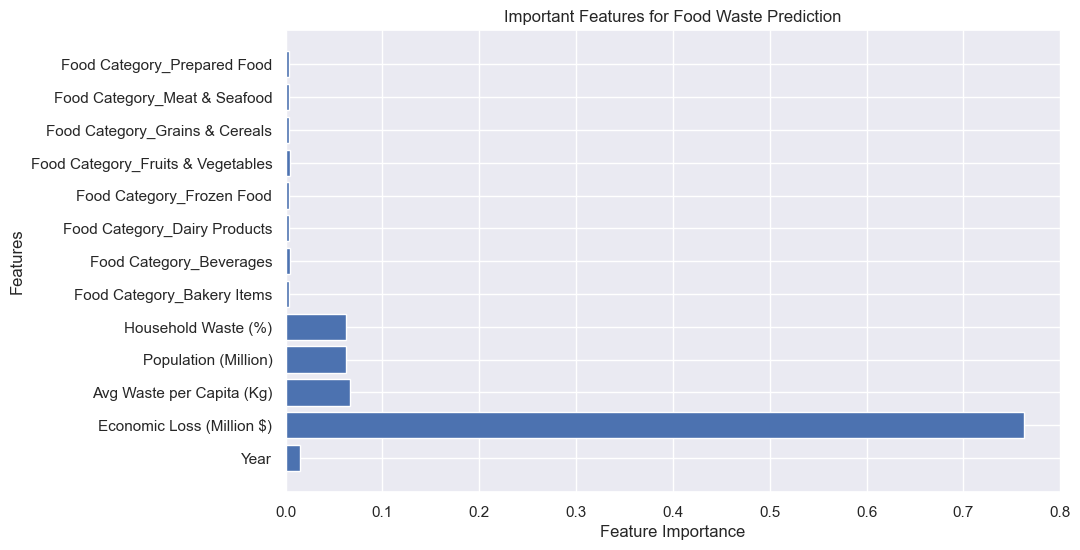

Year: 0.0151
Economic Loss (Million $): 0.7621
Avg Waste per Capita (Kg): 0.0661
Population (Million): 0.0630
Household Waste (%): 0.0629
Food Category_Bakery Items: 0.0035
Food Category_Beverages: 0.0042
Food Category_Dairy Products: 0.0034
Food Category_Frozen Food: 0.0037
Food Category_Fruits & Vegetables: 0.0046
Food Category_Grains & Cereals: 0.0037
Food Category_Meat & Seafood: 0.0037
Food Category_Prepared Food: 0.0040


In [467]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=14) 
rfe.fit(X, y)  

feature_importances = rfe.estimator_.feature_importances_
selected_features = X.columns[rfe.support_]  

plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features for Food Waste Prediction")
plt.show()

# Print selected features and their importance scores
for feature, importance in zip(selected_features, feature_importances):
    print(f"{feature}: {importance:.4f}")


We see that food categories have very less importance in the data. So we drop them

### <b> Dropping food categories

In [468]:
threshold = 0.01

selected_features = feature_names[feature_importances >= threshold]

print("Selected Features:", selected_features)

Selected Features: Index(['Year', 'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')


In [469]:
df1 = X[selected_features]
df1.head()

,Year,Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,2023,40551.22,120.19,953.05,31.91
1,2023,36980.82,104.74,1105.47,36.06
2,2024,11196.04,136.21,1311.91,37.09
3,2024,39191.25,179.27,1349.45,68.93
4,2024,40087.26,155.55,375.84,31.16


<b>Reintroducing important columns

In [470]:
df1["Total Waste (Tons)"]=df["Total Waste (Tons)"]

C:\Users\Souhar\AppData\Local\Temp\ipykernel_13536\3108425342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Total Waste (Tons)"]=df["Total Waste (Tons)"]


In [471]:
df1["Country"]=df["Country"]

C:\Users\Souhar\AppData\Local\Temp\ipykernel_13536\2912594475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Country"]=df["Country"]


In [472]:
df1.head()

,Year,Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Total Waste (Tons),Country
0,2023,40551.22,120.19,953.05,31.91,46299.69,France
1,2023,36980.82,104.74,1105.47,36.06,33096.57,France
2,2024,11196.04,136.21,1311.91,37.09,11962.89,India
3,2024,39191.25,179.27,1349.45,68.93,45038.72,Germany
4,2024,40087.26,155.55,375.84,31.16,39478.70,South Africa


### <b>Grouping data to keep unique (country,year) combinations only 

In [473]:
df1 = df1.groupby(['Country', 'Year']).mean(numeric_only=True).reset_index()
df1.head()

,Country,Year,Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Total Waste (Tons)
0,Argentina,2022,23893.759000,111.239667,711.312667,52.153000,24001.211667
1,Argentina,2023,24941.621071,124.174643,661.387143,50.462143,25361.786071
2,Argentina,2024,24425.670968,109.628065,667.766452,51.524516,23901.823548
3,Australia,2022,26995.519310,126.510690,768.739310,49.482759,27596.264138
4,Australia,2023,28038.661282,116.122821,715.994103,52.093077,26897.794359


## <b>Feature Engineerng

In [474]:
df1['Waste_Level'] = pd.qcut(df1['Total Waste (Tons)'], q=5, labels=["Very Low","Low", "Moderate", "High","Critical"])


In [475]:
df1.head()

,Country,Year,Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Total Waste (Tons),Waste_Level
0,Argentina,2022,23893.759000,111.239667,711.312667,52.153000,24001.211667,Low
1,Argentina,2023,24941.621071,124.174643,661.387143,50.462143,25361.786071,Moderate
2,Argentina,2024,24425.670968,109.628065,667.766452,51.524516,23901.823548,Low
3,Australia,2022,26995.519310,126.510690,768.739310,49.482759,27596.264138,Critical
4,Australia,2023,28038.661282,116.122821,715.994103,52.093077,26897.794359,High


In [476]:
df1=df1.drop("Total Waste (Tons)",axis=1)

### <b>Encoding Waste_Level

In [477]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["Very Low", "Low", "Moderate", "High", "Critical"]])
df1["Waste_Level_Encoded"] = encoder.fit_transform(df1[["Waste_Level"]])


In [478]:
df1.head()

,Country,Year,Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),Waste_Level,Waste_Level_Encoded
0,Argentina,2022,23893.759000,111.239667,711.312667,52.153000,Low,1.0
1,Argentina,2023,24941.621071,124.174643,661.387143,50.462143,Moderate,2.0
2,Argentina,2024,24425.670968,109.628065,667.766452,51.524516,Low,1.0
3,Australia,2022,26995.519310,126.510690,768.739310,49.482759,Critical,4.0
4,Australia,2023,28038.661282,116.122821,715.994103,52.093077,High,3.0


In [479]:
df1=df1.drop("Waste_Level",axis=1)

## <b> Define response and explanatory variables

In [480]:
X=df1.drop(["Waste_Level_Encoded","Country"],axis=1)
y=df1["Waste_Level_Encoded"]

<b> Saving countries in list "countries"

In [481]:
countries=df1["Country"]

## <b>Scaling features

In [482]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## <b>Checking for sampling imbalance

In [483]:
print(df1['Waste_Level_Encoded'].value_counts())


Waste_Level_Encoded
1.0    12
2.0    12
4.0    12
3.0    12
0.0    12
Name: count, dtype: int64


## <b>Train-Test Split

In [484]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X, y, df1.index, test_size=0.2, random_state=42
)

## <b>Model Fitting

### <b>SVM

In [485]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Define kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train and evaluate each kernel
for kernel in kernels:
    print(f"\n🔹 Training SVM with {kernel} kernel...")

    # Train model
    svm_model = SVC(kernel=kernel, C=1.0, random_state=42)
    svm_model.fit(X_train, y_train)

    # Predictions
    y_pred = svm_model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{kernel} Kernel Accuracy: {accuracy:.4f}")


🔹 Training SVM with linear kernel...
linear Kernel Accuracy: 0.5833

🔹 Training SVM with poly kernel...
poly Kernel Accuracy: 0.5000

🔹 Training SVM with rbf kernel...
rbf Kernel Accuracy: 0.3333

🔹 Training SVM with sigmoid kernel...
sigmoid Kernel Accuracy: 0.0000


### <b>KNN

In [486]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.75
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      0.67      0.80         3
         2.0       0.50      1.00      0.67         2
         3.0       1.00      0.33      0.50         3
         4.0       0.67      1.00      0.80         2

    accuracy                           0.75        12
   macro avg       0.83      0.80      0.75        12
weighted avg       0.86      0.75      0.74        12



### <b>Logistic Regression

In [487]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

y_pred_log = log_reg_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.67      0.67      0.67         3
         2.0       0.67      1.00      0.80         2
         3.0       0.67      0.67      0.67         3
         4.0       1.00      1.00      1.00         2

    accuracy                           0.75        12
   macro avg       0.80      0.77      0.76        12
weighted avg       0.78      0.75      0.74        12



c:\Users\Souhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## <b>Model Selection

Selected model SVM with sigmoid kernel

Applying LDA on it

In [488]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [489]:
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions
X_lda = lda.fit_transform(X_scaled, y)

# Split the reduced data
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train and evaluate each kernel
for kernel in kernels:
    print(f"\n🔹 Training SVM with {kernel} kernel...")

    # Train model
    svm_model = SVC(kernel=kernel, C=1.0, random_state=42)
    svm_model.fit(X_train_lda, y_train)

    # Predictions
    y_pred = svm_model.predict(X_test_lda)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{kernel} Kernel Accuracy: {accuracy:.4f}")



🔹 Training SVM with linear kernel...
linear Kernel Accuracy: 0.5833

🔹 Training SVM with poly kernel...
poly Kernel Accuracy: 0.2500

🔹 Training SVM with rbf kernel...
rbf Kernel Accuracy: 0.7500

🔹 Training SVM with sigmoid kernel...
sigmoid Kernel Accuracy: 0.4167


Afer LDA best model with highest accuracy is SVM with kernel "rbf"

Best model for the classification task is SVM

In [490]:
print(f"\n🔹 Training SVM with rbf kernel...")

svm_model = SVC(kernel="rbf", C=1.0, random_state=42)
svm_model.fit(X_train_lda, y_train)

y_pred = svm_model.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
print(f"rbf Kernel Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


🔹 Training SVM with rbf kernel...
rbf Kernel Accuracy: 0.7500
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.67      0.67      0.67         3
         2.0       1.00      0.50      0.67         2
         3.0       0.60      1.00      0.75         3
         4.0       1.00      1.00      1.00         2

    accuracy                           0.75        12
   macro avg       0.85      0.73      0.75        12
weighted avg       0.82      0.75      0.74        12



In [491]:
df_results = pd.DataFrame({
    "Country": countries[X_test.index],  # Retrieve country names using test indices
    "Actual Classification": y_test.values,
    "Predicted Classification": y_pred
})


In [492]:
df_results

,Country,Actual Classification,Predicted Classification
0,Argentina,1.0,1.0
5,Australia,4.0,4.0
36,Russia,2.0,2.0
45,South Korea,3.0,3.0
13,China,1.0,1.0
54,UK,0.0,1.0
33,Mexico,2.0,3.0
48,Spain,3.0,3.0
12,China,1.0,3.0
57,USA,4.0,4.0
